# Pulse gain - Study 1: CW compared to pulses with constant $P_{peak}$
Analyse the QY gain for different laser pulses

#### Simplest ETU3 model

3 _ \
2 _ \
1 _ _ b \
0 _ _ a\
...A S...

### Study of delivered UC power for various excitation pulse profiles 

$P_{avg} = P_{peak} \cdot \frac{\Delta t}{T}$
 
$P_{avg} = 0.5 W/cm^2$

In [1]:
%matplotlib notebook
import matplotlib.pyplot as pl
import sys
sys.path.append('../scripts/')
sys.path.append('../utils/')
from virtualab import Analysis


### Load data

In [89]:
A1 = Analysis()

In [90]:
A1.addexperiment('pulse_study_etu3_cw')
A1.addexperiment('pulse_study_etu3_Pavg_duty_cnt_T_00004')
A1.addexperiment('pulse_study_etu3_Pavg_duty_cnt_T_0001')
A1.addexperiment('pulse_study_etu3_Pavg_duty_cnt_T_0005')
A1.addexperiment('pulse_study_etu3_Pavg_duty_cnt')
A1.addexperiment('pulse_study_etu3_Pavg_duty_cnt_T_002')

In [91]:
for exp in A1.expList:
    exp.sample.data['t'] -= (exp.laser.period - exp.laser.periodOn)
    exp.laser._power['t'] -= (exp.laser.period - exp.laser.periodOn)
    

C:\Users\jean.matias\AppData\Local\Temp\ipykernel_12780\969532716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp.laser._power['t'] -= (exp.laser.period - exp.laser.periodOn)


In [92]:
A1.details

,label,P_avg,P_peak,T,Delta_t
0,E0,0.5,0.5,0.01,0.01
1,E1,0.5,1,0.0004,0.0002
2,E2,0.5,1.0,0.001,0.0005
3,E3,0.5,1.0,0.005,0.0025
4,E4,0.5,1.0,0.01,0.005
5,E5,0.5,1.0,0.02,0.01


<IPython.core.display.Javascript object>


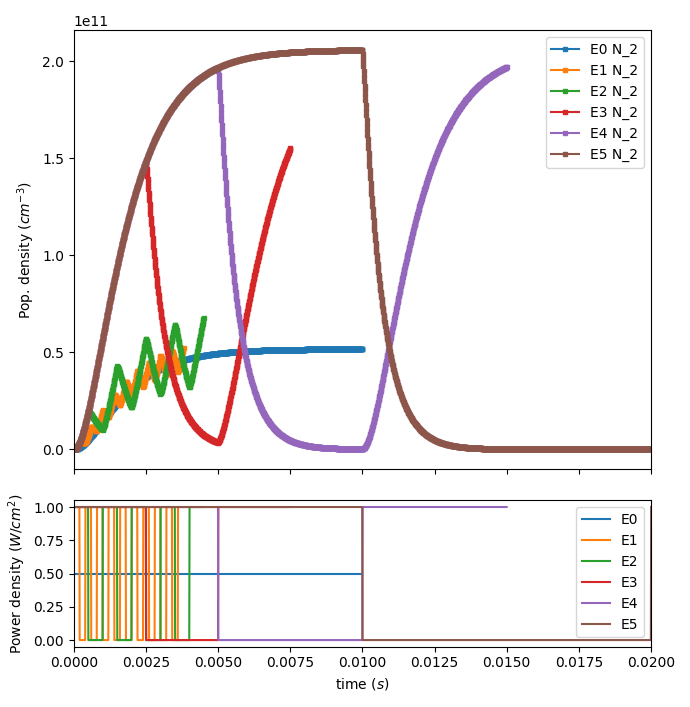

(0.0, 0.02)

In [102]:
A1.plot(x='t', yList=['N_2'])
pl.xlim([0,0.02])

In [104]:
pl.tight_layout()

<IPython.core.display.Javascript object>


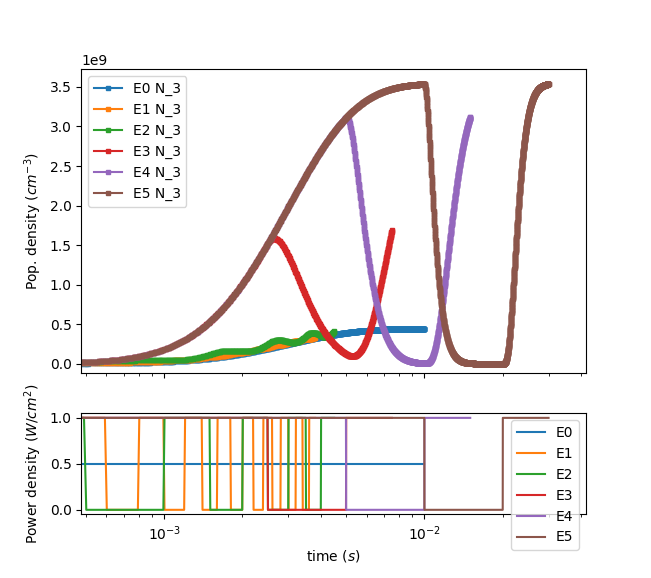

In [106]:
A1.plot(x='t', yList=['N_3'])
# pl.xlim([0,0.02]

In [101]:
pl.tight_layout()

## Delivered photon flux

$\phi_{photon,k} = \int_0^T {\frac{N_k R_k^{rad}}{T}} dt$

### State ${1}$

In [86]:
cwMask = A1.details['label'] == 'E0'
A1.details.loc[cwMask, 'photon_flux_1'] = A1.expList[0].sample.data.iloc[-1]['N_1']
for k in range(1, len(A1.expList)):
    exp = A1.expList[k]
    expMask = A1.details['label'] == f'E{k}'
    periodMask = (exp.sample.data['t'] >= 0) & (exp.sample.data['t'] <= exp.laser.period)
    photonFlux = exp.sample.data.loc[periodMask, 'N_1'].sum() * (1 / exp.laser.samplingRate) / exp.laser.period
    A1.details.loc[expMask, 'photon_flux_1'] = photonFlux

### State ${2}$

In [81]:
cwMask = A1.details['label'] == 'E0'
A1.details.loc[cwMask, 'photon_flux_2'] = A1.expList[0].sample.data.iloc[-1]['N_2']
for k in range(1, len(A1.expList)):
    exp = A1.expList[k]
    expMask = A1.details['label'] == f'E{k}'
    periodMask = (exp.sample.data['t'] >= 0) & (exp.sample.data['t'] <= exp.laser.period)
    photonFlux = exp.sample.data.loc[periodMask, 'N_2'].sum() * (1 / exp.laser.samplingRate) / exp.laser.period
    A1.details.loc[expMask, 'photon_flux_2'] = photonFlux

### State ${3}$

In [87]:
cwMask = A1.details['label'] == 'E0'
A1.details.loc[cwMask, 'photon_flux_3'] = A1.expList[0].sample.data.iloc[-1]['N_3']
for k in range(1, len(A1.expList)):
    exp = A1.expList[k]
    expMask = A1.details['label'] == f'E{k}'
    periodMask = (exp.sample.data['t'] >= 0) & (exp.sample.data['t'] <= exp.laser.period)
    photonFlux = exp.sample.data.loc[periodMask, 'N_3'].sum() * (1 / exp.laser.samplingRate) / exp.laser.period
    A1.details.loc[expMask, 'photon_flux_3'] = photonFlux
A1.details

,label,P_avg,P_peak,T,Delta_t,photon_flux,photon_flux_3,photon_flux_2,absorption_flux,photon_flux_1
0,E0,0.5,0.5,0.01,0.01,4.435163e+08,4.435163e+08,5.158587e+10,1.532204e+21,9.914952e+13
1,E1,0.5,1.0,0.001,0.0005,2.043301e+07,2.043301e+07,1.076365e+10,1.532251e+21,4.099074e+13
2,E2,0.5,1.0,0.005,0.0025,6.265287e+08,6.265287e+08,5.652846e+10,1.532209e+21,9.231222e+13
3,E3,0.5,1.0,0.01,0.005,1.094962e+09,1.094962e+09,7.652615e+10,1.532204e+21,9.846418e+13
4,E4,0.5,1.0,0.02,0.01,1.424315e+09,1.424315e+09,8.944052e+10,1.532204e+21,9.897001e+13


<IPython.core.display.Javascript object>


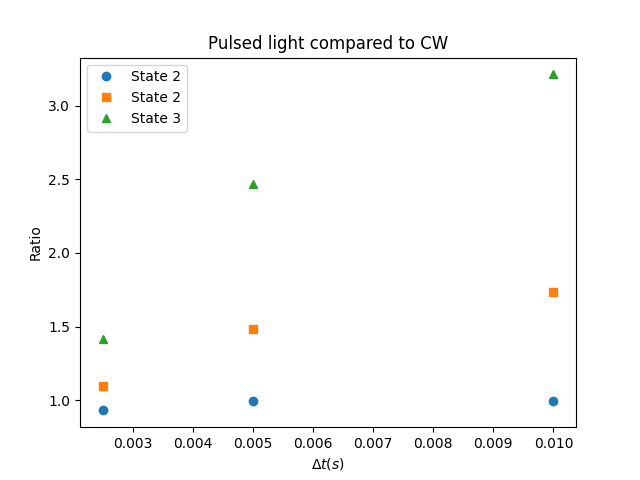

In [88]:
fig, ax = pl.subplots()
ax.plot(A1.details.loc[2:,'Delta_t'], A1.details.loc[2:, 'photon_flux_1'] / A1.details.loc[0, 'photon_flux_1'], 'o', label='State 2')
ax.plot(A1.details.loc[2:,'Delta_t'], A1.details.loc[2:, 'photon_flux_2'] / A1.details.loc[0, 'photon_flux_2'], 's', label='State 2')
ax.plot(A1.details.loc[2:,'Delta_t'], A1.details.loc[2:, 'photon_flux_3'] / A1.details.loc[0, 'photon_flux_3'], '^', label='State 3')
ax.set_xlabel('$\Delta t (s)$')
ax.set_ylabel('Ratio')
ax.set_title('Pulsed light compared to CW')
ax.legend()


## Efficiency ratio

$\eta_k^{Ei} = \frac{\sum_t N_k^{Ei} R_k}{\sum_t \alpha N_a^{Ei} \rho}$

$r_i = \frac{\eta_k^{Ei}}{\eta_k^{cw}}$

$r_i = \frac{\phi_k^{Ei} / \phi_a^{Ei}}{\phi_k^{cw} / \phi_a^{cw}}$

In [82]:
cwMask = A1.details['label'] == 'E0'
A1.details.loc[cwMask, 'absorption_flux'] = A1.expList[0].sample.data.iloc[-1]['N_a']
for k in range(1, len(A1.expList)):
    exp = A1.expList[k]
    expMask = A1.details['label'] == f'E{k}'
    periodMask = (exp.sample.data['t'] >= 0) & (exp.sample.data['t'] <= exp.laser.period)
    photonFlux = exp.sample.data.loc[periodMask, 'N_a'].sum() * (1 / exp.laser.samplingRate) / exp.laser.period
    A1.details.loc[expMask, 'absorption_flux'] = photonFlux
A1.details

,label,P_avg,P_peak,T,Delta_t,photon_flux,photon_flux_3,photon_flux_2,absorption_flux
0,E0,0.5,0.5,0.01,0.01,4.435163e+08,4.435163e+08,5.158587e+10,1.532204e+21
1,E1,0.5,1.0,0.001,0.0005,2.043301e+07,2.043301e+07,1.076365e+10,1.532251e+21
2,E2,0.5,1.0,0.005,0.0025,6.265287e+08,6.265287e+08,5.652846e+10,1.532209e+21
3,E3,0.5,1.0,0.01,0.005,1.094962e+09,1.094962e+09,7.652615e+10,1.532204e+21
4,E4,0.5,1.0,0.02,0.01,1.424315e+09,1.424315e+09,8.944052e+10,1.532204e+21
